# Magnetic fields and the Weyl tensor in the early universe by Bittencourt, Salim & Santos
##  Geoff Cope
##  Univeristy of Utah
##  December 25, 2021

https://arxiv.org/abs/1402.3121

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
epsilon,k,t,r,theta,phi,dt,dr,dtheta,dphi = symbols('epsilon k t r theta phi dt dr dtheta dphi')

In [5]:
a = Function('a')(t)
a

In [6]:
variables = Matrix( [t,r,theta,phi] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣φ⎦

In [7]:
differentials = Matrix( [dt,dr,dtheta,dphi] )
differentials 

⎡  dt  ⎤
⎢      ⎥
⎢  dr  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣ dphi ⎦

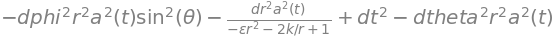

In [9]:
lineElement = expand(dt**2 - a**2 * ( dr**2/( 1 - epsilon*r**2 - ((2*k/r))) +r**2*(dtheta**2 + sin(theta)**2 * dphi**2)) )
lineElement

In [10]:
t,r,theta,phi,dt,dr,dtheta,dphi = symbols('t r theta phi dt dr dtheta dphi')

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡1         0              0              0        ⎤
⎢                                                 ⎥
⎢         2                                       ⎥
⎢       -a (t)                                    ⎥
⎢0  ────────────────      0              0        ⎥
⎢        2   2⋅k                                  ⎥
⎢   - ε⋅r  - ─── + 1                              ⎥
⎢             r                                   ⎥
⎢                                                 ⎥
⎢                       2  2                      ⎥
⎢0         0          -r ⋅a (t)          0        ⎥
⎢                                                 ⎥
⎢                                  2  2       2   ⎥
⎣0         0              0      -r ⋅a (t)⋅sin (θ)⎦

In [13]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡1         0              0              0        ⎤
⎢                                                 ⎥
⎢         2                                       ⎥
⎢       -a (t)                                    ⎥
⎢0  ────────────────      0              0        ⎥
⎢        2   2⋅k                                  ⎥
⎢   - ε⋅r  - ─── + 1                              ⎥
⎢             r                                   ⎥
⎢                                                 ⎥
⎢                       2  2                      ⎥
⎢0         0          -r ⋅a (t)          0        ⎥
⎢                                                 ⎥
⎢                                  2  2       2   ⎥
⎣0         0              0      -r ⋅a (t)⋅sin (θ)⎦

In [15]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("t r theta phi")
t,r,theta,phi = syms

In [17]:
metric = MetricTensor(m,syms)

In [18]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                   ⎡                                ⎛   3          ⎞ d              
⎢                                                                   ⎢                               -⎝ε⋅r  + 2⋅k - r⎠⋅──(a(t))       
⎢                                                                   ⎢                                                 dt             
⎢⎡0         0                 0                     0            ⎤  ⎢             0                 ───────────────────────────      
⎢⎢                                                               ⎥  ⎢                                  ⎛     2   2⋅k    ⎞            
⎢⎢         d                                                     ⎥  ⎢                                r⋅⎜- ε⋅r  - ─── + 1⎟⋅a(t)       
⎢⎢    a(t)⋅──(a(t))                                              ⎥  ⎢                                  ⎝          r     ⎠            
⎢⎢         dt                                                 

In [19]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡     2                                                                                                                              
⎢    d                                                                                                                               
⎢-3⋅───(a(t))                                                                                                                        
⎢     2                                                                                                                              
⎢   dt                                                                                                                               
⎢─────────────                            0                                                    0                                     
⎢     a(t)                                                                                                                           
⎢                                                             

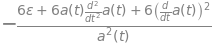

In [20]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [21]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡    ⎛               2                     2⎞       2                                                                                
⎢    ⎜              d            ⎛d       ⎞ ⎟      d                                                                                 
⎢0.5⋅⎜6⋅ε + 6⋅a(t)⋅───(a(t)) + 6⋅⎜──(a(t))⎟ ⎟   3⋅───(a(t))                                                                          
⎢    ⎜               2           ⎝dt      ⎠ ⎟       2                                                                                
⎢    ⎝             dt                       ⎠     dt                                                                                 
⎢──────────────────────────────────────────── - ───────────                                                    0                     
⎢                    2                              a(t)                                                                             
⎢                   a (t)                                     

In [22]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                         ⎡                            2             ⎤                                               
⎢                                         ⎢                           d              ⎥                                               
⎢                                         ⎢                  -r⋅a(t)⋅───(a(t))       ⎥                                               
⎢                                         ⎢                            2             ⎥                      ⎡                        
⎢                                         ⎢                          dt              ⎥                      ⎢                        
⎢                                         ⎢       0          ──────────────────  0  0⎥                      ⎢        0           0  r
⎢                                         ⎢                       3                  ⎥                      ⎢                        
⎢         ⎡0  0  0  0⎤                    ⎢                   

In [23]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                  ⎡                             -k               ⎤                                  
⎢                                                  ⎢         0           ───────────────────  0  0⎥                 ⎡        -k    ⎤ 
⎢                                                  ⎢                      2 ⎛   3          ⎞      ⎥                 ⎢ 0   0  ───  0⎥ 
⎢                  ⎡0  0  0  0⎤                    ⎢                     r ⋅⎝ε⋅r  + 2⋅k - r⎠      ⎥                 ⎢        2⋅r   ⎥ 
⎢                  ⎢          ⎥                    ⎢                                              ⎥                 ⎢              ⎥ 
⎢                  ⎢0  0  0  0⎥                    ⎢         k                                    ⎥                 ⎢ 0   0   0   0⎥ 
⎢                  ⎢          ⎥                    ⎢───────────────────           0           0  0⎥                 ⎢              ⎥ 
⎢                  ⎢0  0  0  0⎥                    ⎢ 2 ⎛   3  